In [ ]:
import pandas as pd

In [23]:
file_path='heart-disease.csv' #Load the dataset
df = pd.read_csv(file_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.info()  #display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
df.describe() #statistical summary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
cat_col = ['cp', 'restecg','slope','thal'] # list of categorical columns to be converted into dummy variables
df = pd.get_dummies(df,columns=cat_col,drop_first=True) # coverting into dummy/indicator variables
df.head() #display the first few rows of the transformed dataset

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,False,False,True,False,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,1,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,0,1,True,False,False,False,False,False,True,False,True,False
3,56,1,120,236,0,178,0,0.8,0,1,True,False,False,True,False,False,True,False,True,False
4,57,0,120,354,0,163,1,0.6,0,1,False,False,False,True,False,False,True,False,True,False


In [ ]:
# Calculate the average age of patients with and without heart disease
avg_age_with_disease = df[df['target'] == 1]['age'].mean()
avg_age_without_disease = df[df['target'] == 0]['age'].mean()

print(f"Average age of patients with heart disease: {avg_age_with_disease}")
print(f"Average age of patients without heart disease: {avg_age_without_disease}")


In [10]:
# to find the distribution of chest pain types among patients
chest_pain_distribution = df[['cp_1', 'cp_2', 'cp_3']].sum()
print("Distribution of chest pain types among patients:")
print(chest_pain_distribution)


Distribution of chest pain types among patients:
cp_1    50
cp_2    87
cp_3    23
dtype: int64


In [11]:
# Find the correlation between thalach and age
correlation_thalach_age = df['thalach'].corr(df['age'])
print(f"Correlation between thalach (maximum heart rate) and age: {correlation_thalach_age}")


Correlation between thalach (maximum heart rate) and age: -0.39852193812106756


In [27]:
# Analyze the effect of sex on the presence of heart disease
heart_disease_by_sex = df.groupby('sex')['target'].mean()
print("Effect of sex on the presence of heart disease:")
print(heart_disease_by_sex)


Effect of sex on the presence of heart disease:
sex
0    0.750000
1    0.449275
Name: target, dtype: float64


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

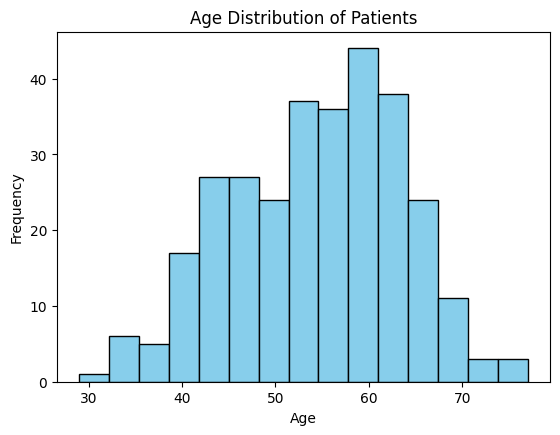

In [30]:
# Set up the visualizations
plt.figure(figsize=(14, 10))

# Histogram of age distribution
plt.subplot(2, 2, 1)
plt.hist(df['age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

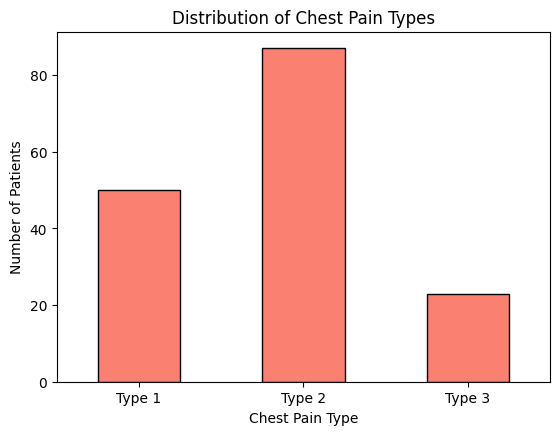

In [33]:
# Calculate the distribution of chest pain types
chest_pain_distribution = df[['cp_1', 'cp_2', 'cp_3']].sum()

# Bar chart of chest pain type distribution
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
chest_pain_distribution.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1, 2], labels=['Type 1', 'Type 2', 'Type 3'], rotation=0)

plt.show()


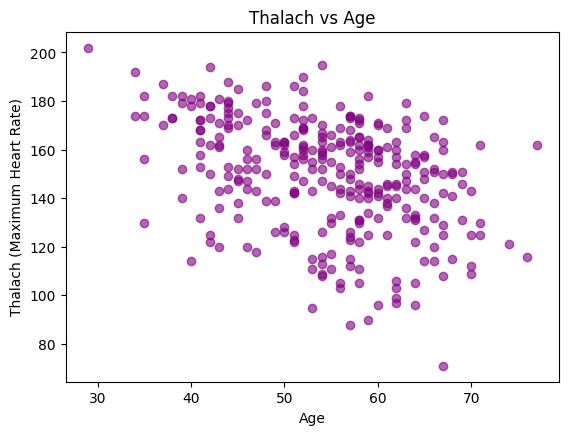

In [34]:
# Scatter plot of thalach vs age
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 3)
plt.scatter(df['age'], df['thalach'], color='purple', alpha=0.6)
plt.title('Thalach vs Age')
plt.xlabel('Age')
plt.ylabel('Thalach (Maximum Heart Rate)')

plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8656\2132470171.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette='coolwarm')


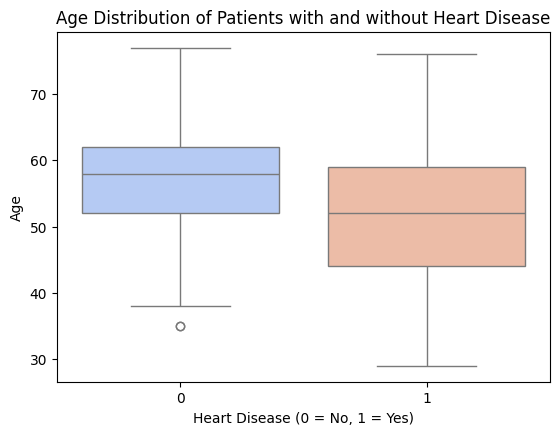

In [39]:
# Box plot of age distribution with and without heart disease
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 4)
sns.boxplot(x='target', y='age', data=df, palette='coolwarm')
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')

plt.show()


In [40]:
# Adavanced Analysis(using numpy)

In [41]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                age       sex  trestbps      chol       fbs   thalach  \
age        1.000000 -0.098447  0.279351  0.213678  0.121308 -0.398522   
sex       -0.098447  1.000000 -0.056769 -0.197912  0.045032 -0.044020   
trestbps   0.279351 -0.056769  1.000000  0.123174  0.177531 -0.046698   
chol       0.213678 -0.197912  0.123174  1.000000  0.013294 -0.009940   
fbs        0.121308  0.045032  0.177531  0.013294  1.000000 -0.008567   
thalach   -0.398522 -0.044020 -0.046698 -0.009940 -0.008567  1.000000   
exang      0.096801  0.141664  0.067616  0.067023  0.025665 -0.378812   
oldpeak    0.210013  0.096093  0.193216  0.053952  0.005747 -0.344187   
ca         0.276326  0.118261  0.101389  0.070511  0.137979 -0.213177   
target    -0.225439 -0.280937 -0.144931 -0.085239 -0.028046  0.421741   
cp_1      -0.147399 -0.041249 -0.081851 -0.012750 -0.060649  0.248317   
cp_2      -0.059432 -0.116588 -0.045107 -0.037918  0.083679  0.165475   
cp_3       0.047516  0.088043  0.151343 -0.050589  

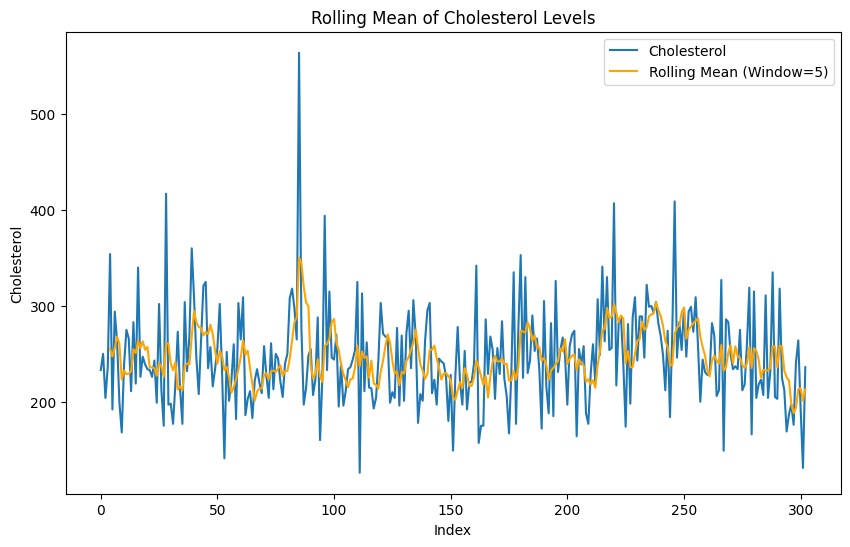

In [42]:
# Perform a rolling mean analysis on the chol (cholesterol) levels with a window size of 5
rolling_mean_chol = df['chol'].rolling(window=5).mean()

# Plot the rolling mean of cholesterol levels
plt.figure(figsize=(10, 6))
plt.plot(df['chol'], label='Cholesterol')
plt.plot(rolling_mean_chol, label='Rolling Mean (Window=5)', color='orange')
plt.title('Rolling Mean of Cholesterol Levels')
plt.xlabel('Index')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()
